<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/main/nb/Chapter10.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch. 10 – Spectrum and envelope

## Figure 10.2. Spectrum and the envelope of three instruments (violin, clarinet, and marimba).

The instrument samples are taken from McGill University Master Samples
(MUMS, Opolko & Wapnick, 2006), polished by Eerola and Ferrer (2008) and
used in subsequent experiments (Eerola et al., 2012).

### Libraries

In [19]:
import numpy as np
import librosa
import librosa.display
from matplotlib import pyplot as plt
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

### 1. Violin properties (spectrum and envelope)

D♯3
1528.0


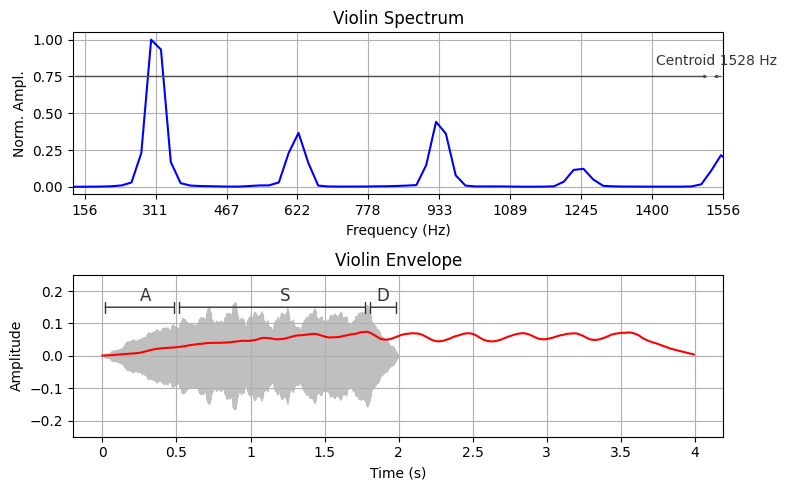

In [22]:
#x, sr = librosa.load('data/63.wav')
url = "https://raw.githubusercontent.com/tuomaseerola/emr/main/data/63.wav"
x, sr = sf.read(io.BytesIO(urlopen(url).read()))
stft = np.abs(librosa.stft(x))
freqs = librosa.fft_frequencies(sr=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))
f = np.nanmedian(f0)        # Get the Hz of the F0 for nice labels
n = librosa.hz_to_note(f)   # Convert Hz to note name
print(n)
X = np.arange(f, f*10, f)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.0, 5.0))

# 1. Spectrum of a tone
# collapse across time and plot a spectrum
Dmean = stft.mean(axis=1)/max(stft.mean(axis=1))
ax[0].plot(freqs, Dmean, color='blue')
ax[0].set_title("Violin Spectrum")
ax[0].set(xlim=[130, X.max()])
ax[0].set_ylabel("Norm. Ampl.")
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid()
ax[0].set_xticks(X)

# calculate spectral centroid and plot it
centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
centroidM = centroid.mean()
print(centroidM.round(0))
centroidM_label = "Centroid " + str(int(centroidM.round(0)))+" Hz"
ax[0].annotate("", xy=(130, 0.75), xycoords='data', xytext=(centroidM, 0.75),
               arrowprops=dict(arrowstyle="<|-", connectionstyle="arc3",
               color="0.3"), size=4)
ax[0].annotate("", xy=(centroidM, 0.75), xycoords='data',
               xytext=(X.max(), 0.75),
               arrowprops=dict(arrowstyle="-|>", connectionstyle="arc3",
               color="0.3"), size=4)
ax[0].text(centroidM-120, 0.83, centroidM_label, size=10, color='0.2')

# Envelope
rms = librosa.feature.rms(y=x, frame_length=2048, hop_length=512)
times = librosa.times_like(rms)
ax[1].plot(times, rms[0], color='red')

librosa.display.waveshow(x, sr=sr, ax=ax[1], color='0.75', max_points=3000)
ax[1].grid()
ax[1].set(ylim=[-0.25, 0.25])
ax[1].text(0.25, 0.17, "A", size=12, color='0.2')
ax[1].text(1.20, 0.17, "S", size=12, color='0.2')
ax[1].text(1.85, 0.17, "D", size=12, color='0.2')
ax[1].annotate("", xy=(0.00, 0.15), xycoords='data', xytext=(0.50, 0.15),
               arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3",
               color='0.2'), size=4)
ax[1].annotate("", xy=(0.50, 0.15), xycoords='data', xytext=(1.79, 0.15),
               arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3",
               color='0.2'), size=4)
ax[1].annotate("", xy=(1.79, 0.15), xycoords='data', xytext=(2.0, 0.15),
               arrowprops=dict(arrowstyle="|-|", connectionstyle="arc3",
               color='0.2'), size=4)
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Violin Envelope")
ax[1].set_xlabel("Time (s)")

fig.tight_layout()
plt.show()

### 2. Clarinet properties (spectrum and envelope)

1812.0


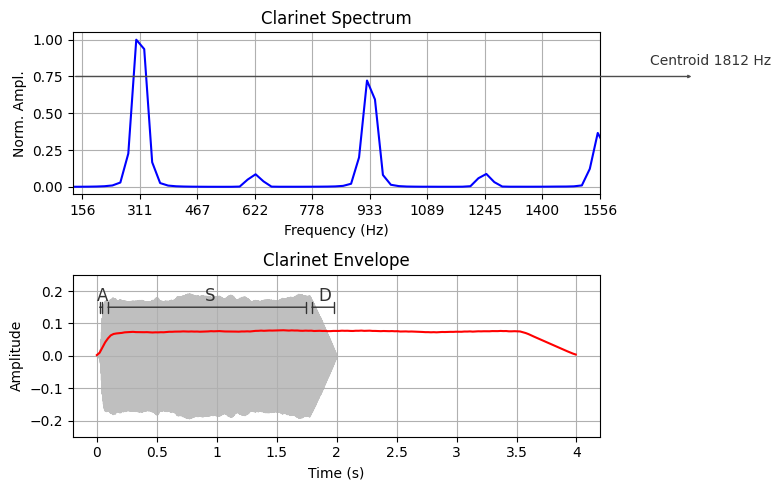

In [23]:
#x, sr = librosa.load('data/24.wav')
url = "https://raw.githubusercontent.com/tuomaseerola/emr/main/data/24.wav"
x, sr = sf.read(io.BytesIO(urlopen(url).read()))

stft = np.abs(librosa.stft(x))
freqs = librosa.fft_frequencies(sr=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f=np.nanmedian(f0)        # Get the Hz of the fundamental frequency for nice labels
n=librosa.hz_to_note(f)  # Convert Hz to note name

X=np.arange(f,f*10,f)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.0, 5.0))

# collapse across time and plot a spectrum representation (energy across frequencies)
Dmean=stft.mean(axis=1)/max(stft.mean(axis=1))
ax[0].plot(freqs,Dmean,color='blue')
#ax[0].label_outer()
#ax[0].set_title("Spectrum")
ax[0].set(xlim=[130, X.max()])
ax[0].set_ylabel("Norm. Ampl.")
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid()
ax[0].set_xticks(X)
ax[0].set_title("Clarinet Spectrum")

# calculate spectral centroid and plot it
centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
centroidM = centroid.mean()
print(centroidM.round(0))
centroidM_label = "Centroid " + str(int(centroidM.round(0)))+" Hz"
ax[0].annotate("",xy=(130, 0.75), xycoords='data',xytext=(centroidM, 0.75), arrowprops=dict(arrowstyle="<|-",connectionstyle="arc3",color="0.3"),size=4)
ax[0].annotate("",xy=(centroidM, 0.75), xycoords='data',xytext=(X.max(), 0.75), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color="0.3"),size=4)
ax[0].text(centroidM-120,0.83,centroidM_label,size=10,color='0.2')

rms=librosa.feature.rms(y=x,frame_length=2048,hop_length=512)                 # Extra dynamics (RMS)
times = librosa.times_like(rms)
ax[1].plot(times, rms[0],color='red')

librosa.display.waveshow(x, sr=sr, ax=ax[1],color='0.75',max_points=3000)
ax[1].grid()
ax[1].set(ylim=[-0.25, 0.25])

ax[1].text(0.00,0.17,"A",size=12,color='0.2')
#ax[0,1].text(0.50,0.99,"D",size=15)
ax[1].text(0.90,0.17,"S",size=12,color='0.2')
ax[1].text(1.85,0.17,"D",size=12,color='0.2')
ax[1].annotate("",xy=(0.00, 0.15), xycoords='data',xytext=(0.07, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
#ax[0,1].annotate("",xy=(0.05, 0.14), xycoords='data',xytext=(0.20, 0.14),arrowprops=dict(arrowstyle="<->",connectionstyle="arc3"),size=15)
ax[1].annotate("",xy=(0.07, 0.15), xycoords='data',xytext=(1.77, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
ax[1].annotate("",xy=(1.77, 0.15), xycoords='data',xytext=(2.0, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
ax[1].set_ylabel("Amplitude")
ax[1].set_xlabel("Time (s)")
ax[1].set_title("Clarinet Envelope")

fig.tight_layout()
plt.show()

### 3. Marimba properties (spectrum and envelope)

D♯3
2125.0


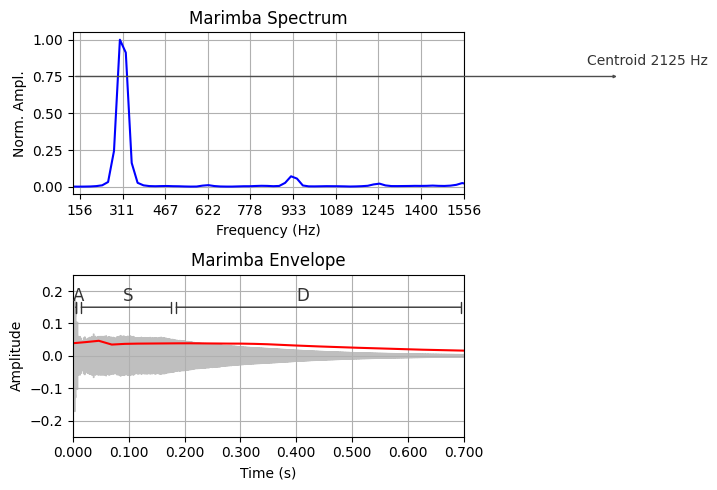

In [24]:
#x, sr = librosa.load('data/90.wav')
url = "https://raw.githubusercontent.com/tuomaseerola/emr/main/data/90.wav"
x, sr = sf.read(io.BytesIO(urlopen(url).read()))

stft = np.abs(librosa.stft(x))
freqs = librosa.fft_frequencies(sr=sr)

f0, voiced_flag, voiced_probs = librosa.pyin(x, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
f=np.nanmedian(f0)        # Get the Hz of the fundamental frequency for nice labels
n=librosa.hz_to_note(f)  # Convert Hz to note name
print(n)
X=np.arange(f,f*10,f)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8.0, 5.0))


# collapse across time and plot a spectrum representation (energy across frequencies)
Dmean=stft.mean(axis=1)/max(stft.mean(axis=1))
ax[0].plot(freqs,Dmean,color='blue')
ax[0].set_title("Marimba Spectrum")
ax[0].set(xlim=[130, X.max()])
ax[0].set_ylabel("Norm. Ampl.")
ax[0].set_xlabel("Frequency (Hz)")
ax[0].grid()
ax[0].set_xticks(X)

# calculate spectral centroid and plot it
centroid = librosa.feature.spectral_centroid(y=x, sr=sr)
centroidM = centroid.mean()
print(centroidM.round(0))
centroidM_label = "Centroid " + str(int(centroidM.round(0)))+" Hz"
ax[0].annotate("",xy=(130, 0.75), xycoords='data',xytext=(centroidM, 0.75), arrowprops=dict(arrowstyle="<|-",connectionstyle="arc3",color="0.3"),size=4)
ax[0].annotate("",xy=(centroidM, 0.75), xycoords='data',xytext=(X.max(), 0.75), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",color="0.3"),size=4)
ax[0].text(centroidM-120,0.83,centroidM_label,size=10,color='0.2')

rms=librosa.feature.rms(y=x,frame_length=2048,hop_length=512)
times = librosa.times_like(rms)
ax[1].plot(times, rms[0],color='red')
librosa.display.waveshow(x, sr=sr, ax=ax[1],color='0.75',max_points=3000)
ax[1].grid()
ax[1].set(ylim=[-0.25, 0.25])
ax[1].set(xlim=[0, 0.70])

ax[1].text(0.00,0.17,"A",size=12,color='0.2')
ax[1].text(0.09,0.17,"S",size=12,color='0.2')
ax[1].text(0.40,0.17,"D",size=12,color='0.2')
ax[1].annotate("",xy=(0.00, 0.15), xycoords='data',xytext=(0.01, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
ax[1].annotate("",xy=(0.01, 0.15), xycoords='data',xytext=(0.18, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
ax[1].annotate("",xy=(0.18, 0.15), xycoords='data',xytext=(0.70, 0.15),arrowprops=dict(arrowstyle="|-|",connectionstyle="arc3",color='0.2'),size=4)
ax[1].set_ylabel("Amplitude")
ax[1].set_title("Marimba Envelope")
ax[1].set_xlabel("Time (s)")

fig.tight_layout()
plt.show()

### References

-   Eerola, T., Ferrer, R., & Alluri, V. (2012). Timbre and affect
    dimensions: Evidence from affect and similarity ratings and acoustic
    correlates of isolated instrument sounds. *Music Perception, 30(1)*,
    49-70. https://doi.org/10.1525/mp.2012.30.1.49
-   Eerola, T. & Ferrer, R. (2008). Instrument Library (MUMS) Revised.
    *Music Perception, 25(3)*, 253-255.
    http://caliber.ucpress.net/doi/abs/10.1525/mp.2008.25.3.253
-   Opolko, F., & Wapnick, J. (2006). *The McGill University master
    samples collection on DVD (3 DVDs)*. Quebec, Canada: McGill
    University.